In [83]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [84]:
#fetching data
data = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']
data_df = pd.read_csv(data, na_values=[" ?"],
                         header=None, 
                         names = headers)
data_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [85]:
#lets look at the variables now.
data_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [86]:
#check for null values
data_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
predclass            0
dtype: int64

In [87]:
#numerical values
data_df.age = data_df.age.astype(float)
data_df['hours-per-week'] = data_df['hours-per-week'].astype(float)

In [88]:
#drop null values
new_df = data_df.dropna()

In [89]:
#check for data types
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null float64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null float64
native-country    30162 non-null object
predclass         30162 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [90]:
#cross check for null values again
new_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
predclass         0
dtype: int64

In [91]:
#Feature Engineering - check which all fields a varialble contains.
print('workclass',new_df.workclass.unique())
print('education',new_df.education.unique())
print('marital-status',new_df['marital-status'].unique())
print('occupation',new_df.occupation.unique())
print('relationship',new_df.relationship.unique())
print('race',new_df.race.unique())
print('sex',new_df.sex.unique())
print('native-country',new_df['native-country'].unique())
print('predclass',new_df.predclass.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 '

In [92]:
#Predclass
new_df.loc[data_df['predclass'] == '>50K', 'predclass'] = 1
new_df.loc[data_df['predclass'] == '<=50K', 'predclass'] = 0

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [93]:
predclass1 = new_df[new_df['predclass'] == 1]
predclass0 = new_df[new_df['predclass'] == 0]

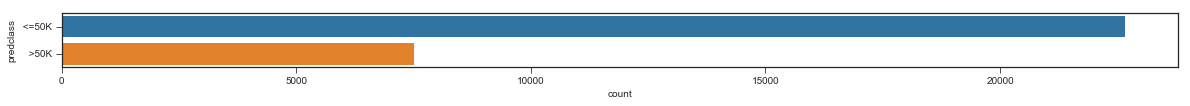

In [94]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=new_df, order=new_df['predclass'].value_counts().index)

In [95]:
#Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

In [96]:
#Education - EDA
new_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


In [97]:
#grouping the similar education fields.
new_df['education'].replace(' Preschool', 'dropout',inplace=True)
new_df['education'].replace(' 10th', 'dropout',inplace=True)
new_df['education'].replace(' 11th', 'dropout',inplace=True)
new_df['education'].replace(' 12th', 'dropout',inplace=True)
new_df['education'].replace(' 1st-4th', 'dropout',inplace=True)
new_df['education'].replace(' 5th-6th', 'dropout',inplace=True)
new_df['education'].replace(' 7th-8th', 'dropout',inplace=True)
new_df['education'].replace(' 9th', 'dropout',inplace=True)
new_df['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
new_df['education'].replace(' HS-grad', 'HighGrad',inplace=True)
new_df['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
new_df['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
new_df['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
new_df['education'].replace(' Bachelors', 'Bachelors',inplace=True)
new_df['education'].replace(' Masters', 'Masters',inplace=True)
new_df['education'].replace(' Prof-school', 'Masters',inplace=True)
new_df['education'].replace(' Doctorate', 'Doctorate',inplace=True)

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [98]:
#Eduaction - Preprocessing
new_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.249885
0,Bachelors,13.000000
1,CommunityCollege,10.369510
3,HighGrad,9.000000
5,dropout,5.609730


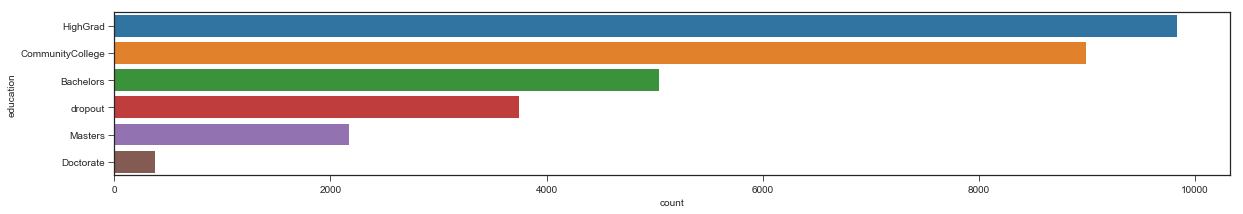

In [99]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=new_df, order=new_df['education'].value_counts().index)

In [100]:
#Marital-status - preprocessing
newdf2 = new_df['marital-status'].replace(' Never-married', 'NotMarried')

In [101]:
new_df['marital-status'].replace(' Never-married', 'NotMarried',inplace=True)
new_df['marital-status'].replace([' Married-AF-spouse'], 'Married',inplace=True)
new_df['marital-status'].replace([' Married-civ-spouse'], 'Married',inplace=True)
new_df['marital-status'].replace([' Married-spouse-absent'], 'NotMarried',inplace=True)
new_df['marital-status'].replace([' Separated'], 'Separated',inplace=True)
new_df['marital-status'].replace([' Divorced'], 'Separated',inplace=True)
new_df['marital-status'].replace([' Widowed'], 'Widowed',inplace=True)

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


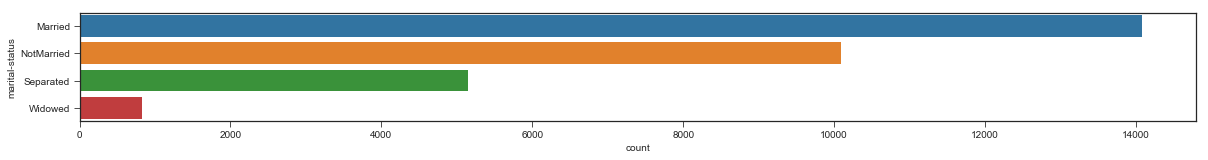

In [102]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=new_df, order=new_df['marital-status'].value_counts().index)

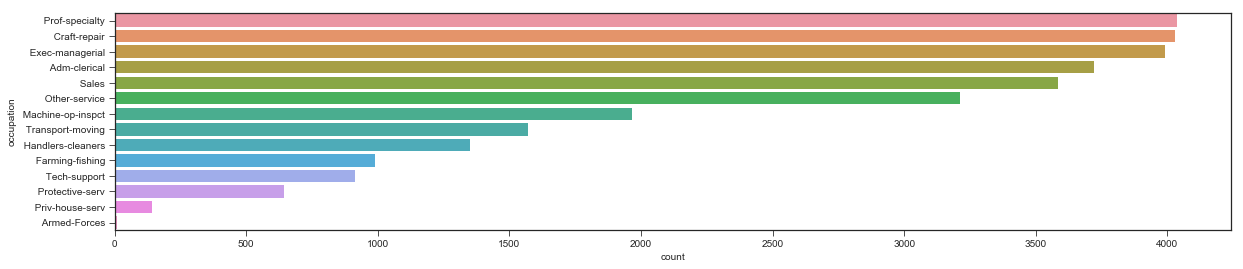

In [103]:
#Occupation
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=new_df, order=new_df['occupation'].value_counts().index)

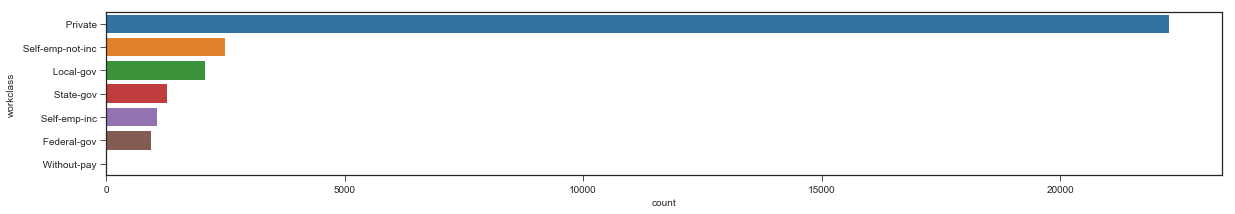

In [104]:
#Workclass
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=new_df, order=new_df['workclass'].value_counts().index)

In [105]:
# make the age variable discretized 
new_df['age_bin'] = pd.cut(new_df['age'], 20)

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
new_df[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,43.95911
0,<=50K,36.60806


<Figure size 1440x360 with 0 Axes>

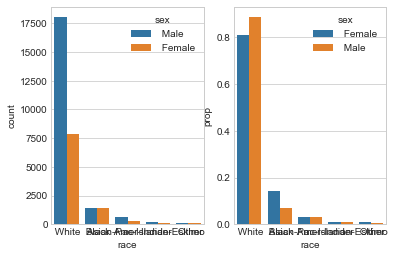

In [107]:
#Race - EDA
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=new_df, ax=axes[0])

prop_df = (new_df[x]
           .groupby(new_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [108]:
# Hours of Work
# Let's use the Pandas Cut function to bin the data in equally sized buckets
new_df['hours-per-week_bin'] = pd.cut(new_df['hours-per-week'], 10)
new_df['hours-per-week'] = new_df['hours-per-week']

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


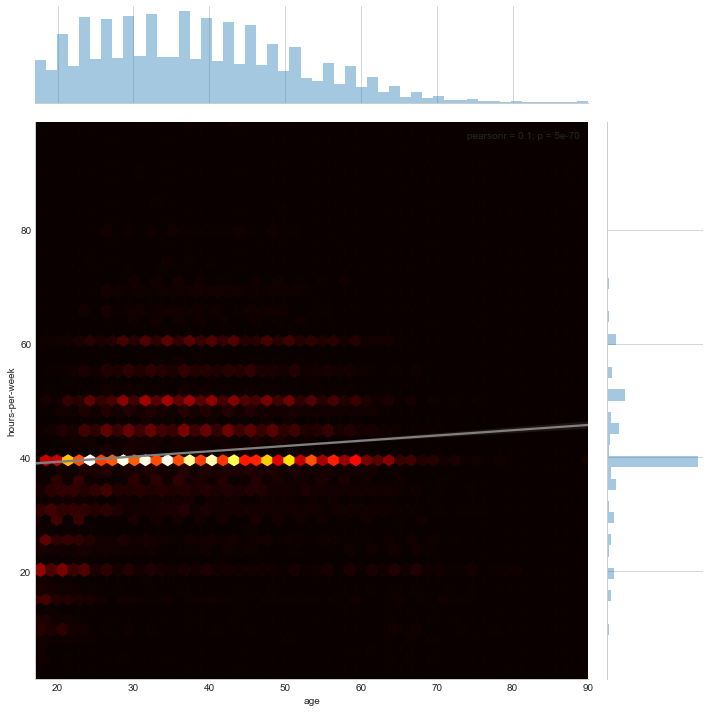

In [109]:
#Create a crossing feature: Age + hour of work
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = new_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

sns.regplot(new_df.age, new_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

In [110]:
# Crossing Numerical Features
new_df['age-hours'] = new_df['age']*new_df['hours-per-week']
new_df['age-hours_bin'] = pd.cut(new_df['age-hours'], 10)

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


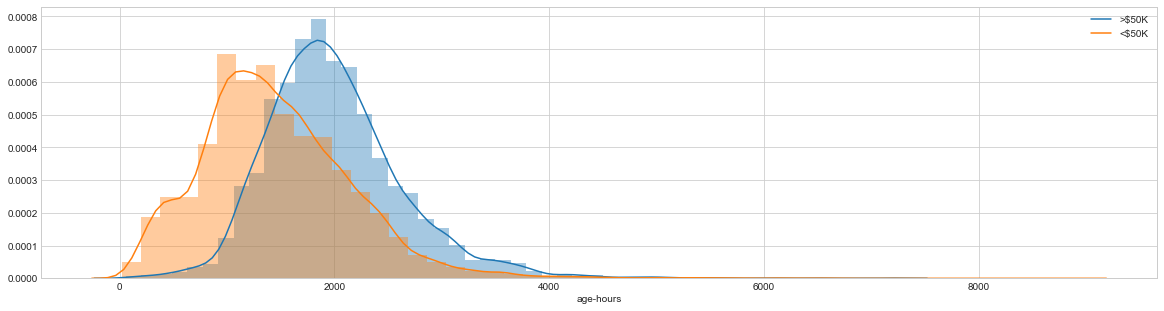

In [111]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.distplot(new_df[new_df['predclass'] == ' >50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(new_df[new_df['predclass'] == ' <=50K']['age-hours'], kde_kws={"label": "<$50K"})

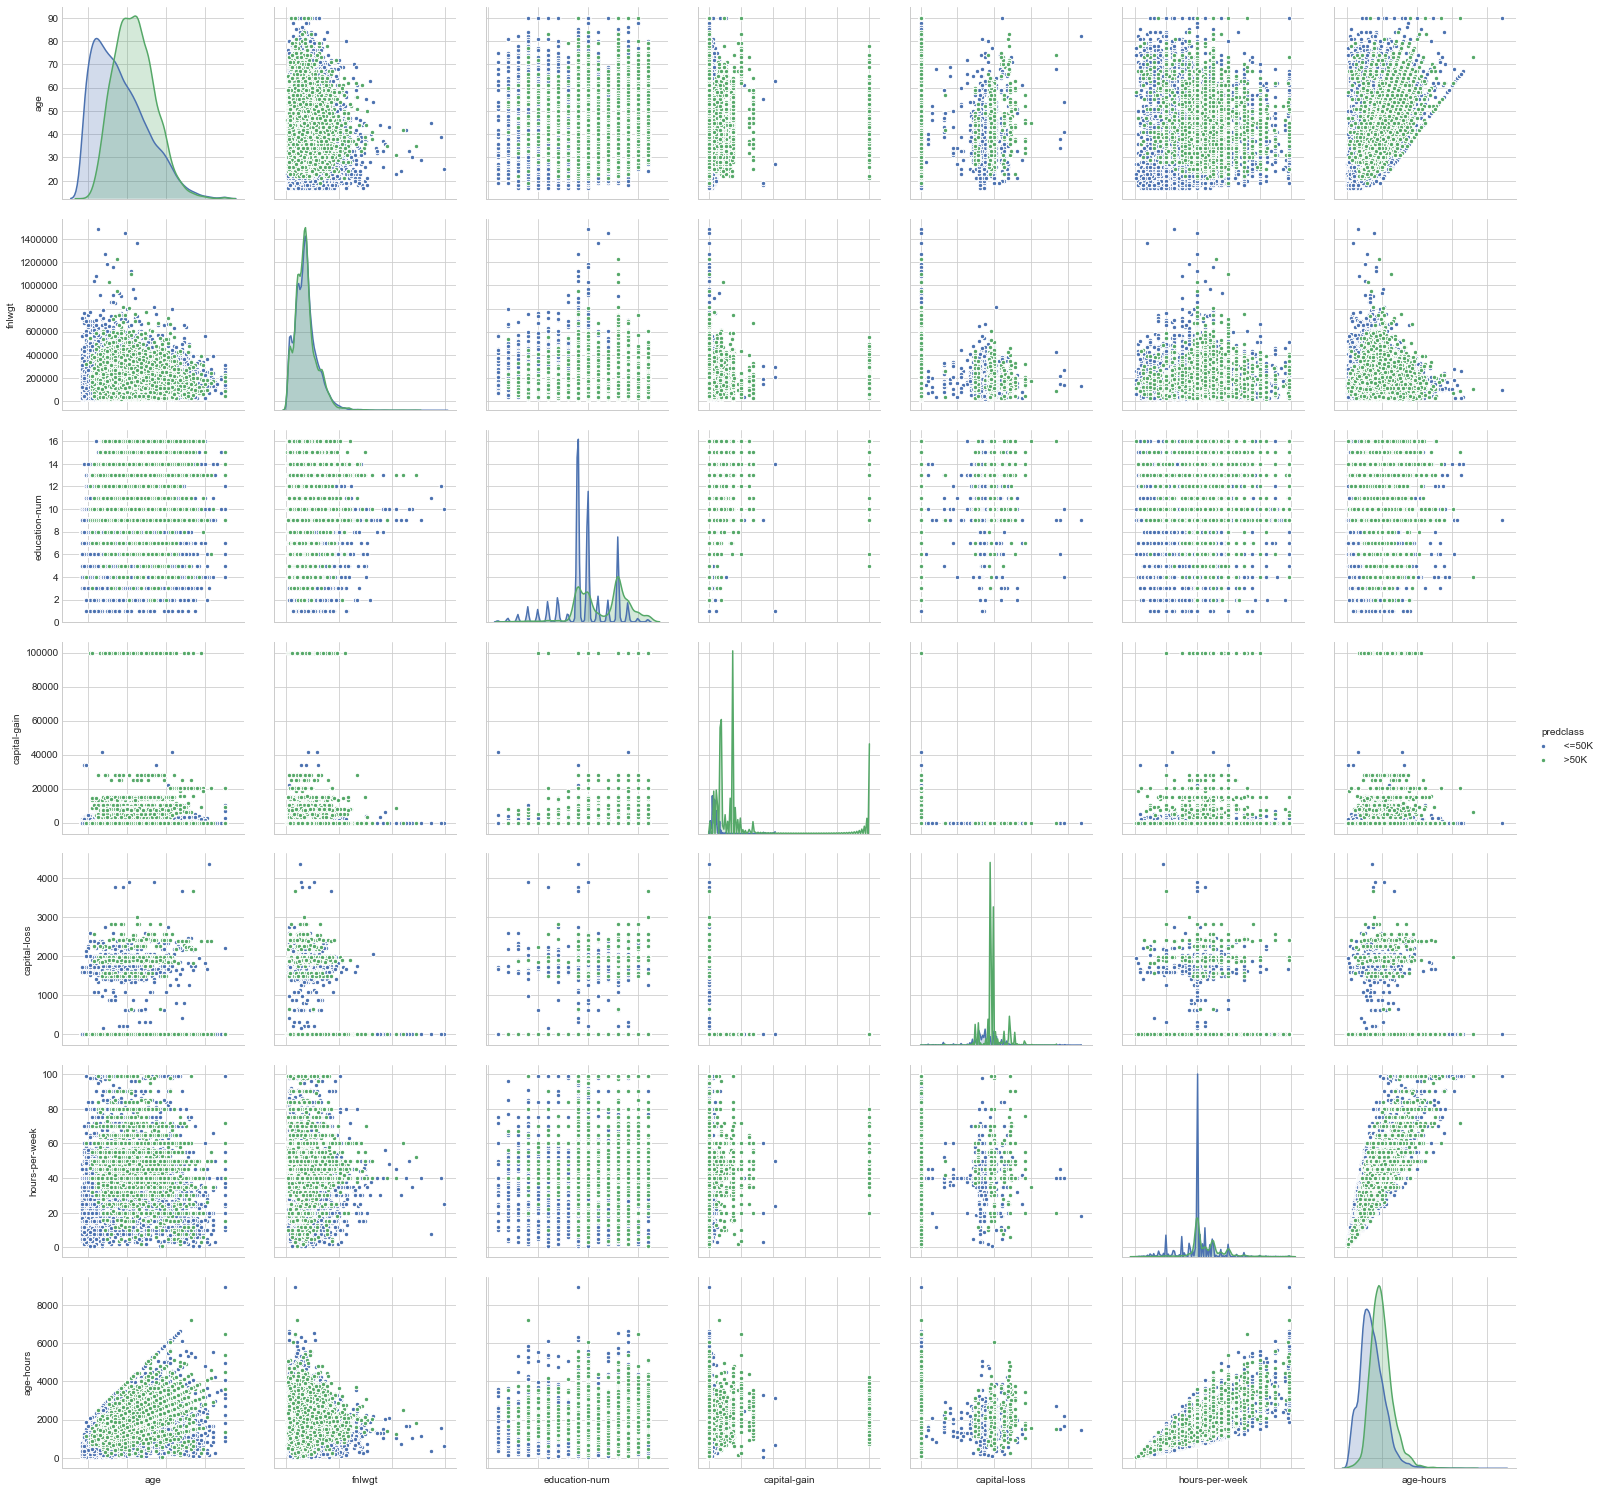

In [112]:
# EXPLORATORY DATA ANALYSIS - Pair Plot(after the preprocessing of data)
#pair plots of entire dataset
pp = sns.pairplot(new_df, hue = 'predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

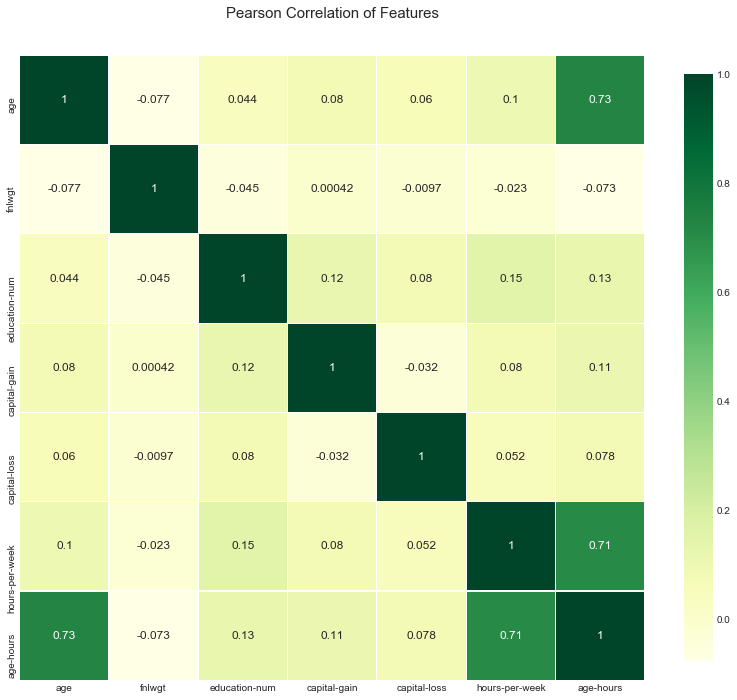

In [113]:
#correlation heatmap of dataset - Check for high correlated variables to drop them if required.
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(new_df)

In [114]:
#Bivariate Analysis
#compare every other variable with the income variable to check if they have any relationship.
new_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
32556,27.0,Private,257302,CommunityCollege,12,Married,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]"
32557,40.0,Private,154374,HighGrad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]"
32558,58.0,Private,151910,HighGrad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]"
32559,22.0,Private,201490,HighGrad,9,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]"
32560,52.0,Self-emp-inc,287927,HighGrad,9,Married,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]"


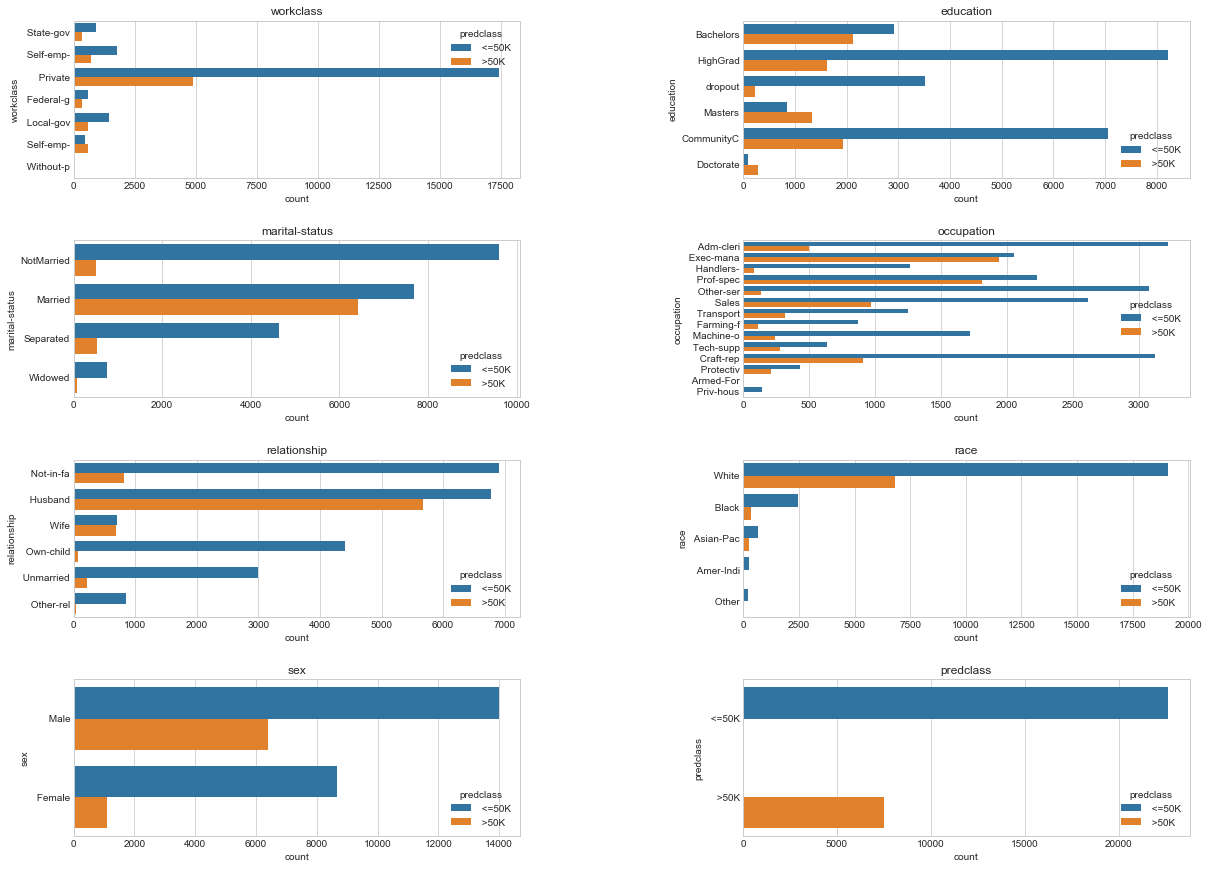

In [116]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = new_df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex','predclass']]  

plot_bivariate_bar(bivariate_df, hue='predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

In [117]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.metrics import confusion_matrix #for confusion matrix

In [118]:
new_df = new_df.apply(LabelEncoder().fit_transform)
new_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,22,5,2491,0,12,1,0,1,4,1,24,0,39,38,0,6,3,589,1
1,33,4,2727,0,12,0,3,0,4,1,0,0,12,38,0,9,1,257,0
2,21,2,13188,3,8,2,5,1,4,1,0,0,39,38,0,5,3,578,1
3,36,2,14354,5,6,0,5,0,2,1,0,0,39,38,0,9,3,766,2
4,11,2,18120,0,12,0,9,5,2,0,0,0,39,4,0,3,3,437,1


In [119]:
#drop any extra fields which we have created in the procedure and remove columns with high relatability.
drop_elements = ['education', 'native-country', 'predclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = new_df["predclass"]
X = new_df.drop(drop_elements, axis=1)

In [120]:
#Train-test split = Splitting the train file to 80% and test file to 20% of overall data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [121]:
#import lib for logistic regression
from sklearn.linear_model import LogisticRegression #logistic regression

In [122]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
#training the model
model = LogisticRegression(multi_class="multinomial",solver='newton-cg').fit(X_train,y_train)

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [124]:
train_predict = model.predict(X_train)

In [125]:
accuracy_score(y_train,train_predict)

0.8347217041734013

In [126]:
#testing the model
model_test = LogisticRegression(multi_class="multinomial",solver='newton-cg').fit(X_test,y_test)

C:\Users\91986\Anaconda3\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [127]:
test_predict = model.predict(X_test)

In [128]:
accuracy_score(y_test,test_predict)

0.8360682910658047

In [143]:
#Confusion matrix
cfm = confusion_matrix(train_predict,y_train)

Text(37.5,0.5,'Actual Class')

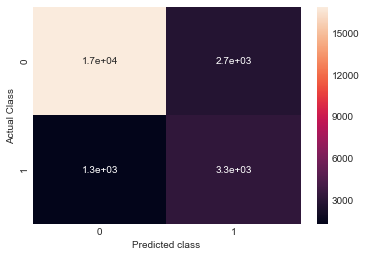

In [144]:
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted class')
plt.ylabel('Actual Class')

In [137]:
#The X-axis represents the Predicted classes and the Y-axis represents the Actual classes, Our true positive values are more our model is performing well.

In [139]:
#Precision, Recall and F1 Score to evaluate our model.
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89      4508
          1       0.74      0.51      0.61      1525

avg / total       0.82      0.83      0.82      6033



In [145]:
#The recall means "how many of this class you find over the whole number of element of this class"
#The precision will be "how many are correctly classified among that class"
#The f1-score is the harmonic mean between precision & recall.
#The support is the number of occurence of the given class in our dataset.
#Based on this data we can infer that our model is performing well.